# 13:10 – 15:00 | Praktische Übung: Einfaches Modell

**Ziel**:

Alle Teilnehmenden erstellen ein funktionierendes neuronales Netz

### Daten: Fashion-MNIST

**Fashion-MNIST ist ein Datensatz mit Bildern von Kleidungsstücken, der häufig verwendet wird, um Deep Learning und neuronale Netze zu erklären und zu üben.**

Er wurde speziell dafür entwickelt, Anfänger*innen einen realistischen, aber einfachen Einstieg in Künstliche Intelligenz zu ermöglichen.

### Welche Daten enthält Fashion-MNIST?

Fashion-MNIST besteht aus vielen kleinen Bildern, und jedes Bild zeigt ein einzelnes Kleidungsstück.

🔢 Umfang des Datensatzes

60.000 Trainingsbilder (zum Lernen)

10.000 Testbilder (zum Testen)

🖼️ Die Bilder

Größe: 28 × 28 Pixel

Graustufen (keine Farben)

Jeder Pixel hat einen Wert von 0 bis 255

0 = schwarz

255 = weiß

👉 Ein Bild besteht also aus 784 Zahlen.

🏷️ Die Klassen (Labels)

Es gibt 10 verschiedene Kategorien:

Label	Kleidungsstück
0. T-Shirt / Top
1. Hose
2. Pullover
3. Kleid
4. Mantel
5. Sandale
6. Hemd
7. Sneaker
8. Tasche
9. Stiefelette

Zu jedem Bild gehört genau ein Label, das sagt, welches Kleidungsstück zu sehen ist.

Was ist die Aufgabe des Modells?

Das neuronale Netz soll:

👉 lernen, das richtige Kleidungsstück auf einem Bild zu erkennen

Zum Beispiel:

Das Bild zeigt einen Schuh

Das Modell gibt aus: „Sneaker (Klasse 7)“

### **Schritt 1 – Umgebung & Daten laden**

In [ ]:
# Zum Laden der Fashion-MNIST Daten
from tensorflow.keras.datasets import fashion_mnist

# Importieren verschiedener Arten von versteckten Schichten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam-Optimierer für bessere Lernrate und geringeren Verlust
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
# Die Daten in Trainings- und Testdaten aufteilen
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Frage: Wie sehen die Daten (x_train, y_train, x_test, y_test) aus?


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

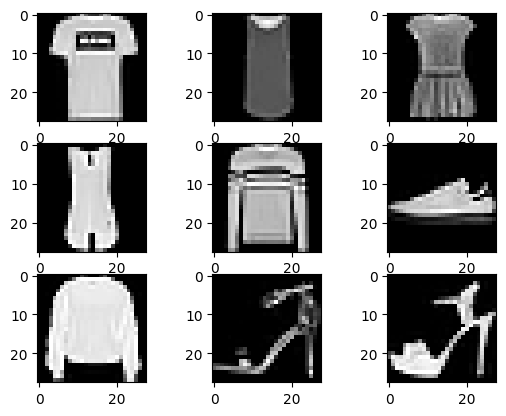

In [ ]:
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

### **Schritt 2 – Daten vorbereiten**

In [ ]:
# Normalisieren
x_train = x_train / 255.0
x_test  = x_test / 255.0

### Frage: Was ist die Zahl 255?

Die Bilder im Datensatz bestehen aus Pixeln.

Jeder Pixel hat einen Helligkeitswert: (0 = schwarz - 255 = weiß)

dazwischen: Grautöne

👉 255 ist der maximal mögliche Pixelwert bei Graustufenbildern (8 Bit).

### Frage: Warum teilen wir durch 255?

🎯 Ziel:

Alle Werte liegen zwischen 0 und 1.

### Frage: Warum ist das wichtig für neuronale Netze?

- Neuronale Netze lernen schneller, wenn die Zahlen klein sind

- Große Zahlen (0–255) machen das Lernen instabil

- Fast alle Deep-Learning-Modelle erwarten normalisierte Daten

👉 Das nennt man Normalisierung.

### **Merksatz für Teilnehmende**

Wir teilen durch 255, damit der Computer die Bilder besser und stabiler lernen kann.

### **Schritt 3 – Modell erstellen**

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Frage: Was bedeutet Sequential?

_model = models.Sequential([...])_

Sequential heißt: Die Schichten werden nacheinander verarbeitet – von oben nach unten.

### Frage: Wie viele Schichten gibt es? Welche?

👉 Es gibt DREI Schichten insgesamt, aber nur ZWEI davon haben Neuronen.

**Schicht 1️⃣: Flatten**

_layers.Flatten(input_shape=(28, 28))_

- Sie hat keine Neuronen

- Sie lernt nichts

- Sie formt nur die Daten um

👉 Konvertiert ein 28×28 Bild in einen Vektor von 784 Zahlen

**Schicht 2️⃣: Erste Dense-Schicht (versteckte Schicht)**

_layers.Dense(128, activation="relu")_

- 128 Neuronen

- Lernt Muster

- Dies ist die versteckte Schicht

**Schicht 3️⃣: Ausgabeschicht**

*layers.Dense(10, activation="softmax")*

- 10 Neuronen

- Ein Neuron pro Klasse

- Gibt Wahrscheinlichkeiten aus

### **Schritt 4 – Modell trainieren**

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=8,
    validation_split=0.2
)

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7707 - loss: 0.6606 - val_accuracy: 0.8516 - val_loss: 0.4297
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8602 - loss: 0.3988 - val_accuracy: 0.8643 - val_loss: 0.3818
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8733 - loss: 0.3520 - val_accuracy: 0.8683 - val_loss: 0.3567
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8834 - loss: 0.3178 - val_accuracy: 0.8692 - val_loss: 0.3627
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8868 - loss: 0.3039 - val_accuracy: 0.8777 - val_loss: 0.3418
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8943 - loss: 0.2882 - val_accuracy: 0.8771 - val_loss: 0.3455
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8994 - loss: 0.2733 - val_accuracy: 0.8873 - val_loss: 0.3180
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9020 - loss: 0.2590 - val_accu

# **15:00–15:20 | ☕☕☕ Pause ☕☕☕**

## 15:20 – 16:40 | Modellbewertung & Interpretation | Mini-Projekt

Thema: Ergebnisse analysieren, Verbesserungen diskutieren

**Ziel:**

Die Teilnehmenden sollen:

- verstehen, wie gut ein Modell wirklich ist

- den Unterschied zwischen Training, Validierung und Test begreifen

- erkennen, was Overfitting ist

- Ideen bekommen, wie man ein Modell verbessern kann

### Modell auf Testdaten bewerten

📌 Warum brauchen wir Testdaten?

- Trainingsdaten → Modell lernt hier

- Validierungsdaten → Kontrolle während des Trainings

- Testdaten → ehrliche Prüfung am Ende

👉 Die Testdaten hat das Modell noch nie gesehen.

- Loss: Wie viele Fehler macht das Modell?

- Accuracy: Wie oft liegt das Modell richtig?

In [ ]:
# Modellbewertung

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8773 - loss: 0.3480
Test Accuracy: 0.8730000257492065


**Beispiel:**

Test Accuracy: 0.87

👉 Das Modell erkennt 87 % der Kleidungsstücke korrekt.

**Diskussionsfrage**

❓ Ist 87 % gut oder schlecht?

### Training vs. Validierung visualisieren

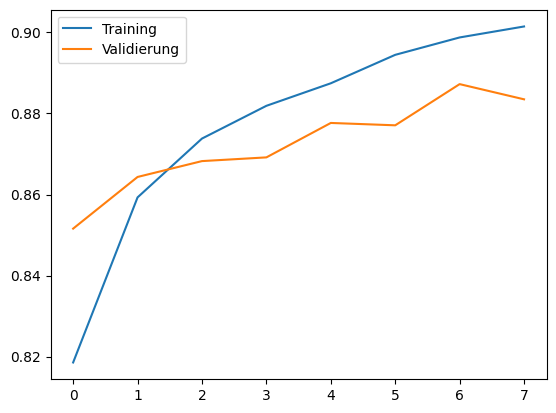

In [ ]:
# Training vs. Validierung visualisieren

plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validierung")
plt.legend()
plt.show()

🧠 Wie lesen wir diesen Plot?

- Training Accuracy
→ Wie gut das Modell die Trainingsdaten gelernt hat

- Validation Accuracy
→ Wie gut das Modell auf neuen (aber ähnlichen) Daten ist

📊 Typische Beobachtung

- Training Accuracy höher

- Validation Accuracy niedriger

👉 Das ist normal.

**Diskussionsfrage**

❓ Warum ist Training oft besser als Test?

### Was ist Overfitting?

🧠 Definition

Das Modell lernt die Trainingsdaten zu gut
und wird auf neuen Daten schlecht.

📉 Typisches Zeichen für Overfitting

- Training Accuracy ↑↑

- Validation Accuracy ↓ oder stagniert

👉 Die Kurven gehen auseinander.

❓ **Frage**

Wollen wir ein Modell, das:

A) alles auswendig lernt

B) gut generalisiert?

### Wie könnte man das Modell verbessern?

🔧 Möglichkeit 1: Mehr Trainingszeit

✔️ manchmal hilfreich

❌ kann Overfitting verstärken

In [ ]:
epochs=15

🔧 Möglichkeit 2: Größeres Modell

✔️ lernt komplexere Muster

❌ braucht mehr Daten

In [ ]:
layers.Dense(256, activation="relu")

<Dense name=dense_2, built=False>

🔧 Möglichkeit 3: Dropout (optional zeigen)

🧠 Idee:

- Schaltet zufällig Neuronen aus

- Zwingt das Modell, robuster zu lernen

In [ ]:
layers.Dropout(0.3)

<Dropout name=dropout, built=True>

🔧 Möglichkeit 4: Convolutional Neural Network

Bilder haben Struktur
→ CNNs sind besser für Bilder

### Ein Bild vorhersagen + Plot

Gib eine Bildnummer zwischen 0 und 9999 ein: 12


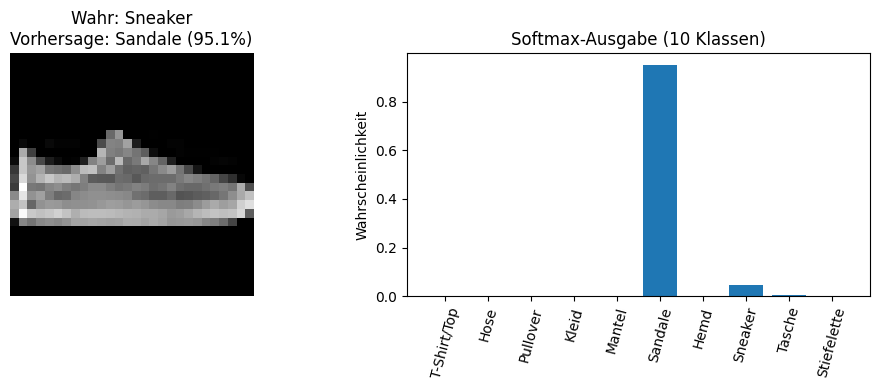

Top-3 Vorhersagen:
Sandale     : 95.1%
Sneaker     : 4.4%
Tasche      : 0.4%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# 1) Daten laden + normalisieren (wie bei dir)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0

# 2) Klassen-Namen (Fashion-MNIST)
class_names = [
    "T-Shirt/Top", "Hose", "Pullover", "Kleid", "Mantel",
    "Sandale", "Hemd", "Sneaker", "Tasche", "Stiefelette"
]

# 3) Ein Testbild auswählen
idx = int(input("Gib eine Bildnummer zwischen 0 und 9999 ein: ")) # ändere z.B. auf 0, "7", "12", 123, ...
img = x_test[idx]
true_label = y_test[idx]

# 4) Vorhersage machen (model muss vorher trainiert sein!)
probs = model.predict(img[None, ...], verbose=0)[0]   # Form (10,)
pred_label = int(np.argmax(probs))

# 5) Plot: Bild + Wahrscheinlichkeiten
plt.figure(figsize=(10, 4))

# links: Bild
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(
    f"Wahr: {class_names[true_label]}\n"
    f"Vorhersage: {class_names[pred_label]} ({probs[pred_label]*100:.1f}%)"
)

# rechts: Softmax-Balken
plt.subplot(1, 2, 2)
plt.bar(range(10), probs)
plt.xticks(range(10), class_names, rotation=75)
plt.ylabel("Wahrscheinlichkeit")
plt.title("Softmax-Ausgabe (10 Klassen)")

plt.tight_layout()
plt.show()

# 6) Optional: Top-3 ausgeben (sehr hilfreich fürs Verständnis)
top3 = np.argsort(probs)[-3:][::-1]
print("Top-3 Vorhersagen:")
for k in top3:
    print(f"{class_names[k]:12s}: {probs[k]*100:.1f}%")


### **Abschluss-Aufgabe**

- Ändere epochs von 5 auf 10.

- Wird es besser? Oder Overfitting? (Vergleiche Training/Validierung)

- Probiere Dense(256) statt Dense(128).

## Mini-Projekt: “Zahlen erkennen wie ein Handy” (MNIST)

Ziel:

Du trainierst ein Modell, das handgeschriebene Ziffern erkennt, und baust eine kleine “Demo”:

- zufällige Testbilder anzeigen

- Vorhersage + Wahrscheinlichkeit plotten

- Fehlerbilder finden & diskutieren

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Daten laden
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Lösungen

In [ ]:
# 1) Setup & Daten laden

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test :", x_test.shape,  "y_test :", y_test.shape)

# Normalisieren
x_train = x_train / 255.0
x_test  = x_test  / 255.0

x_train: (60000, 28, 28) y_train: (60000,)
x_test : (10000, 28, 28) y_test : (10000,)


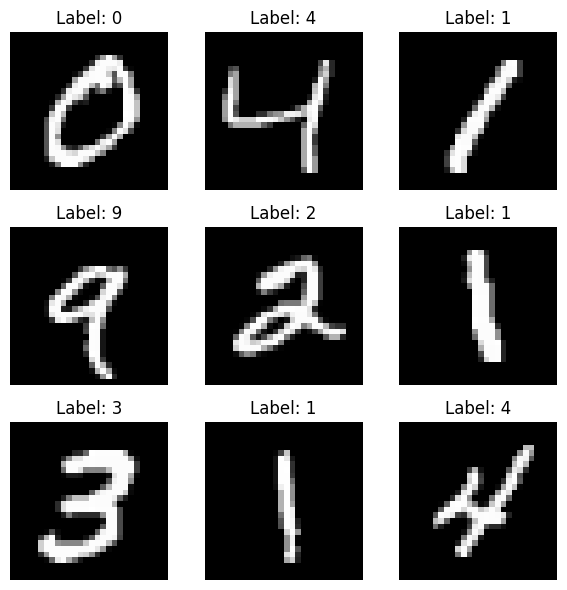

In [ ]:
# 2) Erste Sichtprüfung: 9 Beispiele plotten

plt.figure(figsize=(6,6))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# 3) Modell bauen (einfaches MLP)

model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8718 - loss: 0.4579 - val_accuracy: 0.9545 - val_loss: 0.1568
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9592 - loss: 0.1383 - val_accuracy: 0.9640 - val_loss: 0.1181
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0899 - val_accuracy: 0.9701 - val_loss: 0.0986
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9812 - loss: 0.0644 - val_accuracy: 0.9711 - val_loss: 0.0943
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9856 - loss: 0.0463 - val_accuracy: 0.9727 - val_loss: 0.0918


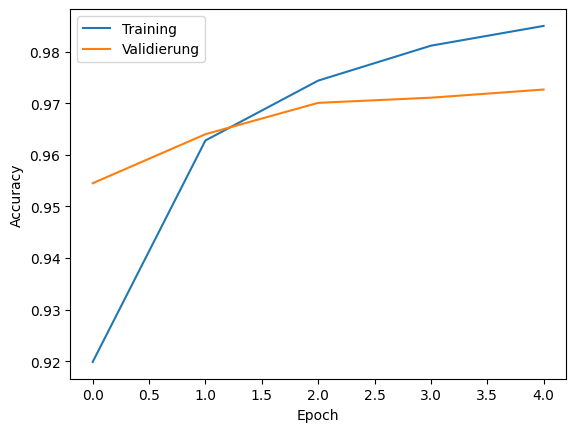

In [ ]:
# 4) Trainieren + Lernkurven plotten

history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)

plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validierung")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# 5) Testbewertung

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.0992
Test Accuracy: 0.9739999771118164


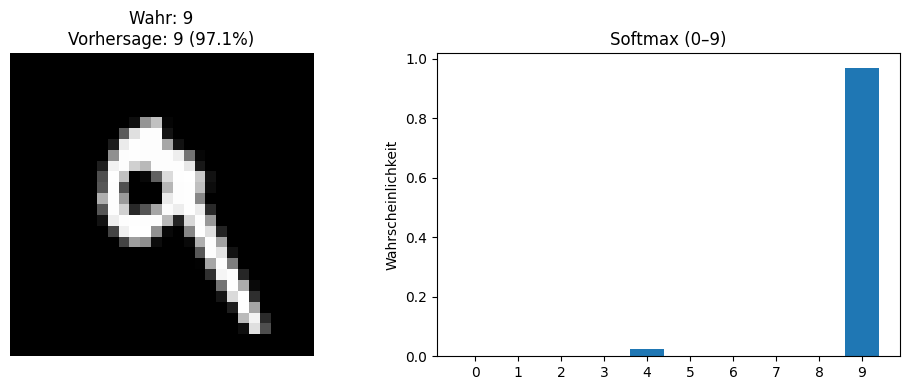

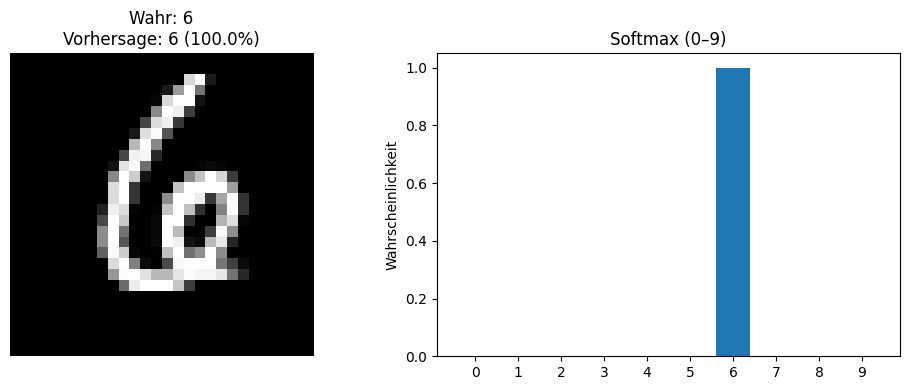

In [ ]:
# 6) Einzelbild-Vorhersage mit Plot (Bild + Softmax)

def show_prediction(idx):
    img = x_test[idx]
    true_label = y_test[idx]

    probs = model.predict(img[None, ...], verbose=0)[0]
    pred_label = int(np.argmax(probs))

    plt.figure(figsize=(10,4))

    # Bild
    plt.subplot(1,2,1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"Wahr: {true_label}\nVorhersage: {pred_label} ({probs[pred_label]*100:.1f}%)")

    # Softmax-Balken
    plt.subplot(1,2,2)
    plt.bar(range(10), probs)
    plt.xticks(range(10))
    plt.ylabel("Wahrscheinlichkeit")
    plt.title("Softmax (0–9)")

    plt.tight_layout()
    plt.show()

# ausprobieren
show_prediction(7)
show_prediction(123)

Anzahl falscher Vorhersagen: 260
Beispiel-Index: 247


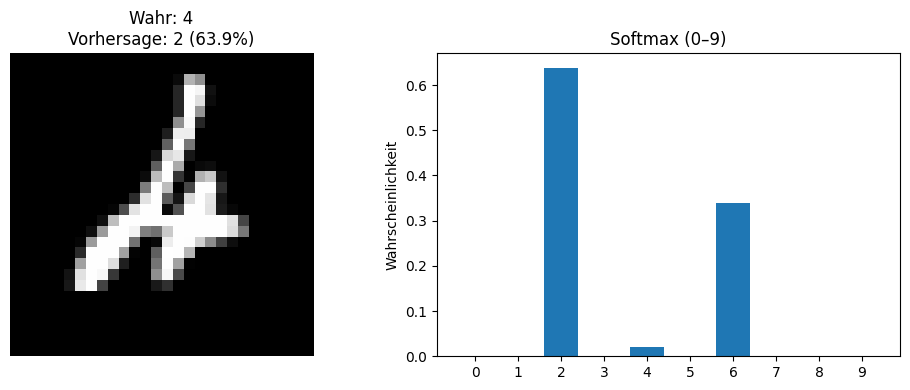

In [ ]:
# 7) Mini-Challenge: Finde ein falsch klassifiziertes Bild

preds = np.argmax(model.predict(x_test, verbose=0), axis=1)
wrong_idx = np.where(preds != y_test)[0]

print("Anzahl falscher Vorhersagen:", len(wrong_idx))
print("Beispiel-Index:", wrong_idx[0])

show_prediction(int(wrong_idx[0]))

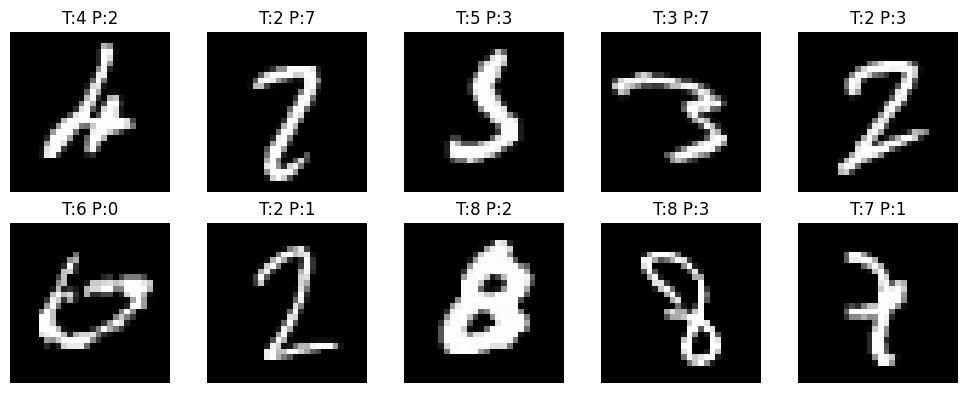

In [ ]:
# 8) (Optional) “Fehler-Galerie” (10 falsche Beispiele)

plt.figure(figsize=(10,4))
for i, idx in enumerate(wrong_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"T:{y_test[idx]} P:{preds[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()